# ScRNA-Seq from [Segerstolpe](https://www.ebi.ac.uk/biostudies/arrayexpress/studies/E-MTAB-5061)

In [1]:
# Import packages
import scanpy as sc
import pandas as pd
import numpy as np
from functions import data_preprocessing as dp

In [5]:
# Get sample ID labels
path = '../../../../data/raw/data_for_evaluating_cell_type_annotation/Segerstolpe/'

file = 'pancreas_refseq_rpkms_counts_3514sc.txt'
df = pd.read_table(path + file, sep='\t')

sample_ID = pd.DataFrame(df.columns.to_list()[1:])
sample_ID.to_csv("../../../../data/raw/data_for_evaluating_cell_type_annotation/Segerstolpe/labels.txt", sep='\t', index=False)

del path, file, df, sample_ID

In [2]:
# Load data
path = '../../../../data/raw/data_for_evaluating_cell_type_annotation/Segerstolpe/'

file = 'data.txt'
df = pd.read_table(path + file, sep=',', index_col=0)

In [10]:
df

,AZ_A1,AZ_A10,AZ_A11,AZ_A12,AZ_A2,AZ_A3,AZ_A4,AZ_A5,AZ_A6,AZ_A7,...,HP1526901T2D_P22,HP1526901T2D_P23,HP1526901T2D_P24,HP1526901T2D_P3,HP1526901T2D_P4,HP1526901T2D_P5,HP1526901T2D_P6,HP1526901T2D_P7,HP1526901T2D_P8,HP1526901T2D_P9
SGIP1,0,0,0,0,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZIN2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
CLIC4,0,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,16,21,0
AGBL4,0,0,0,0,0,0,0,0,0,0,...,0,12,0,0,0,0,0,0,0,0
NECAP2,0,0,0,0,0,0,0,0,0,111,...,1,1,0,0,0,0,0,9,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERCC_0.45776367:mix1_0.91552734:mix2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ERCC_0.22888184:mix1_0.45776367:mix2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ERCC_0.11444092:mix1_0.22888184:mix2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ERCC_0.05722046:mix1_0.11444092:mix2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Load annotations
path = '../../../../data/raw/data_for_evaluating_cell_type_annotation/Segerstolpe/'

file = 'annotations.txt'
ann = pd.read_table(path + file, sep=',', index_col=0)

In [14]:
ann

,cell_quality,cell_type,disease,sex,age
AZ_A1,low quality cell,not applicable,normal,male,43
AZ_A10,OK,delta,normal,male,43
AZ_A11,OK,alpha,normal,male,43
AZ_A12,OK,delta,normal,male,43
AZ_A2,OK,gamma,normal,male,43
...,...,...,...,...,...
HP1526901T2D_P5,low quality cell,not applicable,type II diabetes mellitus,female,55
HP1526901T2D_P6,low quality cell,not applicable,type II diabetes mellitus,female,55
HP1526901T2D_P7,OK,beta,type II diabetes mellitus,female,55
HP1526901T2D_P8,low quality cell,not applicable,type II diabetes mellitus,female,55


In [4]:
X = np.array(df).T
Y = ann.iloc[:,1].to_list()
sample_ID = df.columns.to_list()
gene_symbols = df.index.to_list()

adata = sc.AnnData(X=X)
adata.index = gene_symbols
adata.var_names = gene_symbols
adata.obs["cell_type"] = Y
adata.obs["sample_ID"] = sample_ID
adata.obs["cell_quality"] = ann.iloc[:,0].to_list()
adata.obs["disease"] = ann.iloc[:,2].to_list()
adata.obs["sex"] = ann.iloc[:,3].to_list()
adata.obs["age"] = ann.iloc[:,4].to_list()

# Checking for duplicate genes
duplicate_genes = adata.var_names[adata.var_names.duplicated()]
if not duplicate_genes.empty:
    print(f"Duplicate genes found: {duplicate_genes}")

In [5]:
adata

AnnData object with n_obs × n_vars = 3514 × 25525
    obs: 'cell_type', 'sample_ID', 'cell_quality', 'disease', 'sex', 'age'

In [7]:
adata.var.head()

""
SGIP1
AZIN2
CLIC4
AGBL4
NECAP2


In [5]:
adata = dp.QC().QC_metric_calc(adata)

In [6]:
#Filter genes:
print('Number of genes before filtering: {:d}'.format(adata.n_vars))

# Min "20" cells - filters out 0 count genes
sc.pp.filter_genes(adata, min_cells=20)
print(f'Number of genes after filtering so theres min {20} unique cells per gene: {adata.n_vars}')

Number of genes before filtering: 25525
Number of genes after filtering so theres min 20 unique cells per gene: 17883


In [7]:
# Filter out "not applicable" samples
adata = adata[adata.obs['cell_type'] != "not applicable",:]

In [8]:
adata.obs['cell_type'].unique()

array(['delta', 'alpha', 'gamma', 'ductal', 'acinar', 'beta',
       'unclassified endocrine', 'co-expression', 'MHC class II', 'PSC',
       'endothelial', 'epsilon', 'mast', 'unclassified'], dtype=object)

## Normalize

In [9]:
norm_qc_adata = dp.log1p_normalize(adata)
del norm_qc_adata.layers['pp_counts']

In [12]:
norm_qc_adata

AnnData object with n_obs × n_vars = 2209 × 25525
    obs: 'cell_type', 'sample_ID', 'cell_quality', 'disease', 'sex', 'age', 'size_factors'
    layers: 'log1p_counts'

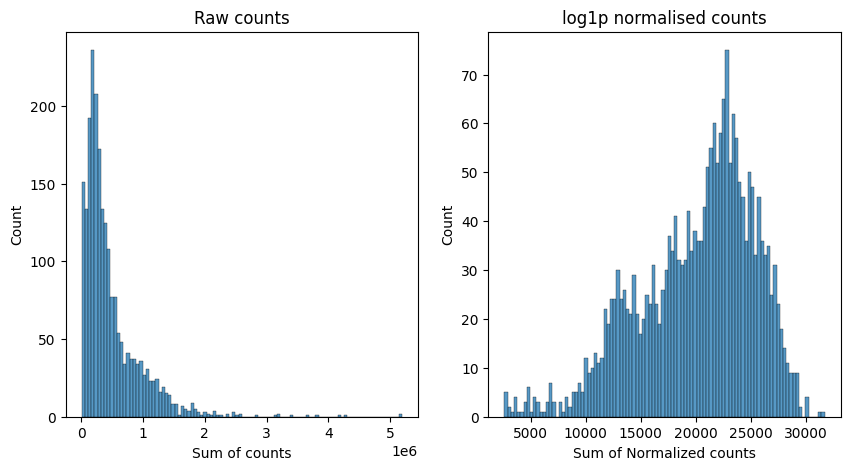

In [10]:
# Visualize counts before and after normalization
dp.EDA().VisualizeNormalization(norm_qc_adata)

In [11]:
# Download normalized count matrix
norm_qc_adata.write('../../../../data/processed/data_for_evaluating_cell_type_annotation/Segerstolpe.h5ad')